# Data pre-processing
## Missing Values
We use `pandas` to create a sample DataFrame with some missing `NaN` values. The `isnull().sum()` method helps us quickly see how many missing values are in each column. Then, we illustrate `dropna()` to remove rows, showing its impact. For imputation, `scikit-learn` provides the `SimpleImputer`. Notice how we fit the imputer on the data and then transform it. This is a common pattern in `scikit-learn`: `fit()` learns the parameters (e.g., the mean), and `transform()` applies these learned parameters.
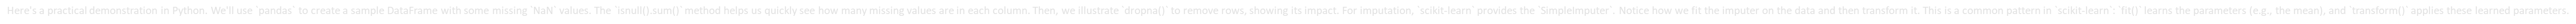
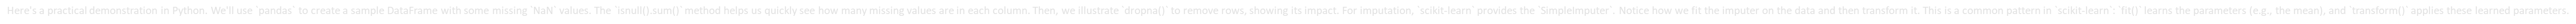
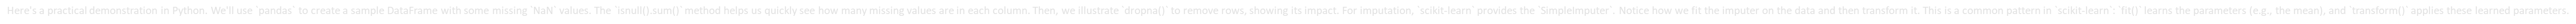
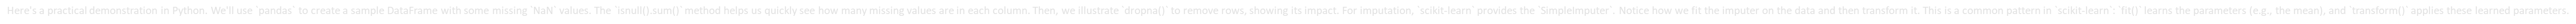

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)


# Create a sample DataFrame with missing values
df = pd.DataFrame([
    ['A', 10, np.nan],
    ['B', np.nan, 20],
    ['A', 12, 22],
    ['C', 11, np.nan],
    ['B', 15, 25]
], columns=['category', 'value1', 'value2'])

print("Original DataFrame:")
print(df)

# Identifying missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Option 1: Eliminate rows with any missing values
df_cleaned_rows = df.dropna()
print("\nDataFrame after dropping rows:")
print(df_cleaned_rows)

# Option 2: Impute missing numerical values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit the imputer on the training data (important!)
df[['value1', 'value2']] = imputer.fit_transform(df[['value1', 'value2']])
print("\nDataFrame after mean imputation:")
print(df)

Original DataFrame:
  category  value1  value2
0        A    10.0     NaN
1        B     NaN    20.0
2        A    12.0    22.0
3        C    11.0     NaN
4        B    15.0    25.0

Missing values per column:
category    0
value1      1
value2      2
dtype: int64

DataFrame after dropping rows:
  category  value1  value2
2        A    12.0    22.0
4        B    15.0    25.0

DataFrame after mean imputation:
  category  value1     value2
0        A    10.0  22.333333
1        B    12.0  20.000000
2        A    12.0  22.000000
3        C    11.0  22.333333
4        B    15.0  25.000000


## Ordinal Features
For ordinal features, we assign numerical values that respect their inherent order. A simple way is manual mapping using a Python dictionary and the `map` function in pandas. However, for a more robust and consistent approach, especially within a machine learning pipeline, `scikit-learn`'s `OrdinalEncoder` is excellent. It allows you to specify the order of categories, ensuring correct numerical representation. Remember that `fit_transform` is used here, where `fit` learns the mapping and `transform` applies it.
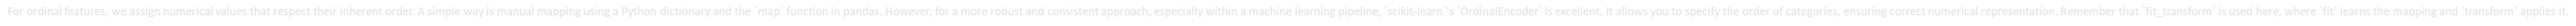
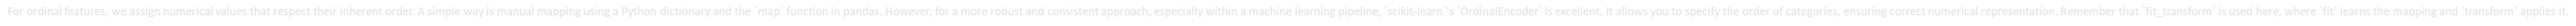
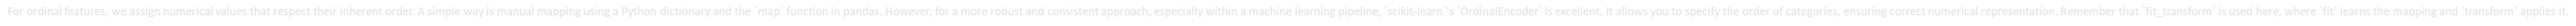
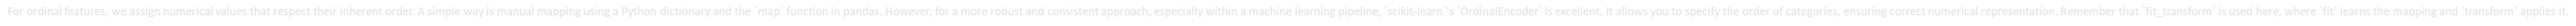

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df_ordinal = pd.DataFrame({
    'size': ['XL', 'L', 'M', 'XL', 'S']
})

size_mapping = {
    'S': 0,
    'M': 1,
    'L': 2,
    'XL': 3
}

df_ordinal['size_encoded'] = df_ordinal['size'].map(size_mapping)
print("Ordinal Encoding (Manual Mapping):")
print(df_ordinal)

# Using Scikit-learn's OrdinalEncoder
# Need to reshape the data for OrdinalEncoder (expects 2D array)
encoder = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL']]) 
# Note: categories argument must be explicitly set for a specific order
df_ordinal['size_encoded_sklearn'] = encoder.fit_transform(df_ordinal[['size']])
print("\nOrdinal Encoding (Scikit-learn):")
print(df_ordinal)



Ordinal Encoding (Manual Mapping):
  size  size_encoded
0   XL             3
1    L             2
2    M             1
3   XL             3
4    S             0

Ordinal Encoding (Scikit-learn):
  size  size_encoded  size_encoded_sklearn
0   XL             3                   3.0
1    L             2                   2.0
2    M             1                   1.0
3   XL             3                   3.0
4    S             0                   0.0


##  Nominal Features
Here's how to perform one-hot encoding. Pandas offers `get_dummies()`, which is very convenient for direct use on DataFrames. Notice the `drop_first=True` argument, which helps mitigate the dummy variable trap by dropping one of the generated columns. For a more formal machine learning setup, `scikit-learn`'s `OneHotEncoder` is preferred, especially when building pipelines. It requires the input to be a 2D array, hence the double brackets around `['color']`. We also use `drop='first'` here. The `get_feature_names_out` method helps reconstruct the DataFrame with meaningful column names.
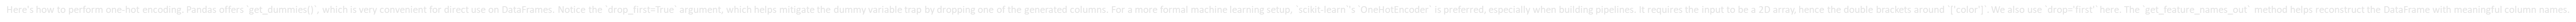
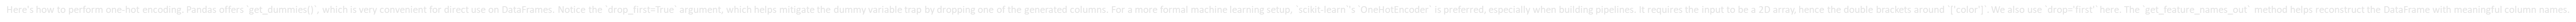
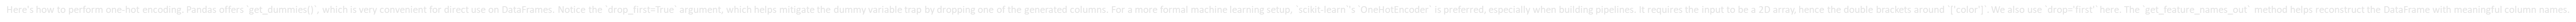
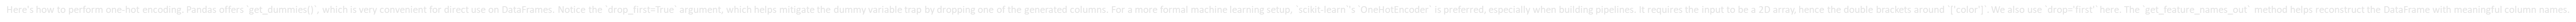

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_nominal = pd.DataFrame({
    'color': ['Red', 'Green', 'Blue', 'Red', 'Green']
})

print("Original DataFrame:")
print(df_nominal)

# Option 1: Pandas get_dummies (simplest for quick use)
df_one_hot_pd = pd.get_dummies(df_nominal, columns=['color'], drop_first=True) 
# drop_first=True avoids dummy variable trap
print("\nOne-Hot Encoding (Pandas get_dummies):")
print(df_one_hot_pd)

# Option 2: Scikit-learn OneHotEncoder (better for pipelines)
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' avoids dummy trap
# Need to reshape for OneHotEncoder
encoded_data = encoder.fit_transform(df_nominal[['color']])
df_one_hot_sklearn = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
print("\nOne-Hot Encoding (Scikit-learn OneHotEncoder):")
print(df_one_hot_sklearn)

Original DataFrame:
   color
0    Red
1  Green
2   Blue
3    Red
4  Green

One-Hot Encoding (Pandas get_dummies):
   color_Green  color_Red
0        False       True
1         True      False
2        False      False
3        False       True
4         True      False

One-Hot Encoding (Scikit-learn OneHotEncoder):
   color_Green  color_Red
0          0.0        1.0
1          1.0        0.0
2          0.0        0.0
3          0.0        1.0
4          1.0        0.0


## Dataset Splitting
The `train_test_split` function from `scikit-learn.model_selection` is your go-to for splitting data. We pass our features (X) and target (y). `test_size` determines the proportion of the dataset to include in the test split. `random_state` is crucial for reproducibility; setting it to a fixed number ensures you get the same split every time. For classification problems, `stratify=y` is very important. It ensures that the proportion of target classes is approximately the same in both the training and test sets, preventing skewed distributions, especially with imbalanced datasets.

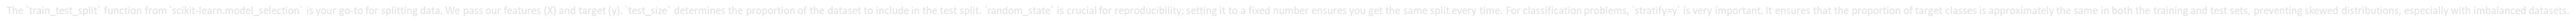
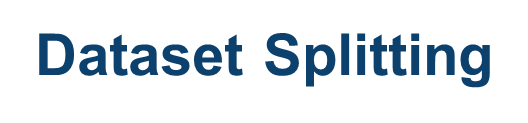
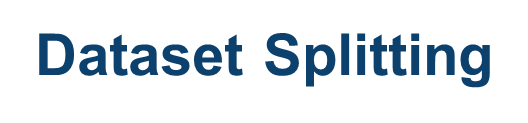
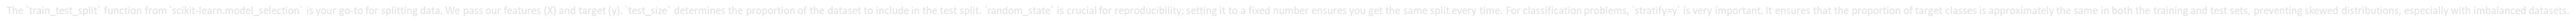
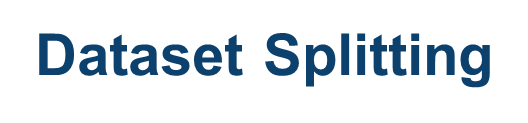
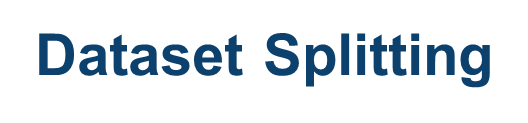
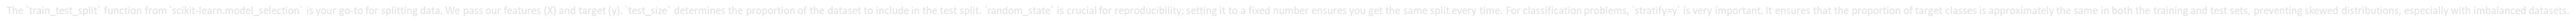
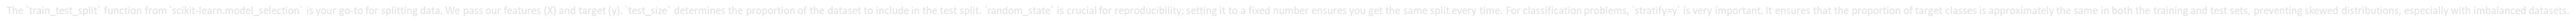

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample data
X = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
y = pd.Series(np.random.randint(0, 2, 100)) # Binary target variable

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# random_state for reproducibility
# stratify=y for balanced classes in train/test sets (important for classification)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check distribution of target variable in splits
print("\ny_train value counts:\n", y_train.value_counts(normalize=True))
print("y_test value counts:\n", y_test.value_counts(normalize=True))

Original X shape: (100, 5)
Original y shape: (100,)

X_train shape: (80, 5)
X_test shape: (20, 5)
y_train shape: (80,)
y_test shape: (20,)

y_train value counts:
 0    0.5375
1    0.4625
Name: proportion, dtype: float64
y_test value counts:
 0    0.55
1    0.45
Name: proportion, dtype: float64


## Feature scaling
We create a dummy dataset with features on different scales. We then split it into training and testing sets. For both `StandardScaler` and `MinMaxScaler`, observe the crucial pattern: `fit_transform` is used on the training data to learn the scaling parameters and apply the transformation. Then, only `transform` is used on the test data. This ensures that the test data is scaled using the same reference points (mean/std, min/max) learned from the training data, mimicking a real-world scenario where you wouldn't have access to the future data for scaling.
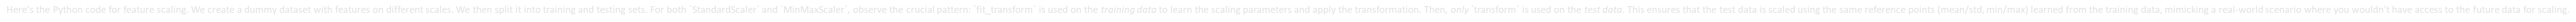
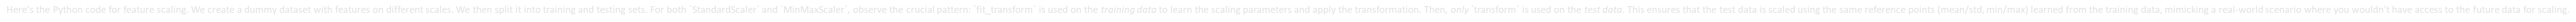
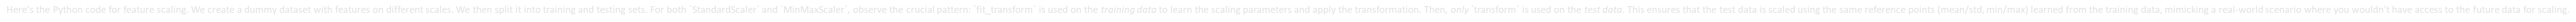
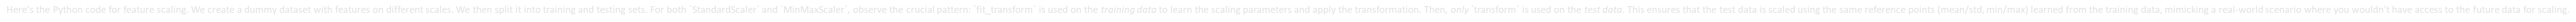

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Create a sample DataFrame
X = pd.DataFrame({
    'feature1': np.random.normal(loc=100, scale=20, size=50), # e.g., income
    'feature2': np.random.normal(loc=5, scale=1, size=50)    # e.g., age
})

y = np.random.randint(0, 2, size=50) # Dummy target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Original X_train descriptive stats:")
print(X_train.describe())

# Standardization
scaler_std = StandardScaler()
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test) # Only transform, do not fit again!

print("\n--- After Standardization ---")
print("X_train_scaled_std (first 5 rows):\n", pd.DataFrame(X_train_scaled_std, columns=X.columns).head())
print("X_train_scaled_std mean:\n", np.mean(X_train_scaled_std, axis=0))
print("X_train_scaled_std std:\n", np.std(X_train_scaled_std, axis=0))

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test) # Only transform!

print("\n--- After Min-Max Normalization ---")
print("X_train_scaled_minmax (first 5 rows):\n", pd.DataFrame(X_train_scaled_minmax, columns=X.columns).head())
print("X_train_scaled_minmax min:\n", np.min(X_train_scaled_minmax, axis=0))
print("X_train_scaled_minmax max:\n", np.max(X_train_scaled_minmax, axis=0))


Original X_train descriptive stats:
         feature1   feature2
count   35.000000  35.000000
mean    99.183717   4.977603
std     20.821075   1.117855
min     51.172437   3.000856
25%     84.994211   4.117145
50%     99.350588   5.053864
75%    116.931041   5.805600
max    138.800753   7.170848

--- After Standardization ---
X_train_scaled_std (first 5 rows):
    feature1  feature2
0 -0.728648  1.282661
1 -1.030013  0.967500
2  0.008132 -1.186777
3  1.930516  0.034454
4 -0.103916  0.147424
X_train_scaled_std mean:
 [-7.80328183e-16 -6.24896960e-16]
X_train_scaled_std std:
 [1. 1.]

--- After Min-Max Normalization ---
X_train_scaled_minmax (first 5 rows):
    feature1  feature2
0  0.377256  0.812938
1  0.306681  0.729668
2  0.549801  0.160478
3  1.000000  0.483144
4  0.523561  0.512992
X_train_scaled_minmax min:
 [0. 0.]
X_train_scaled_minmax max:
 [1. 1.]


## L1 Regularization
In this example, we load the Iris dataset and then intentionally add some noisy, random features to better illustrate the effect of L1 regularization. We scale the features, which is crucial when using regularization. Then, we train a `LogisticRegression` model with `penalty='l1'`. The parameter `C` is the inverse of the regularization strength; a smaller `C` means stronger regularization. After training, we print the coefficients. You should observe that for the L1 regularized model, some of the coefficients for the less important features (especially our artificially added noise features) will be driven to exactly zero, effectively selecting a subset of features. We contrast this with L2 regularization where coefficients are shrunk but rarely become exactly zero.
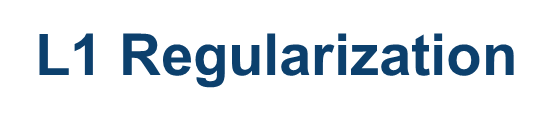
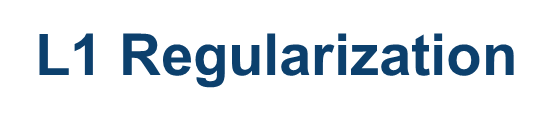
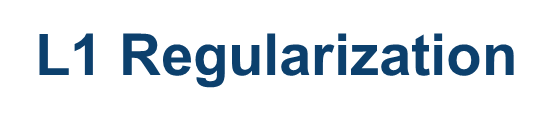
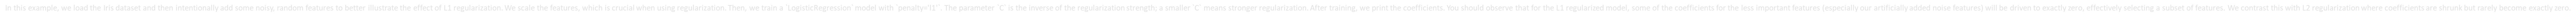
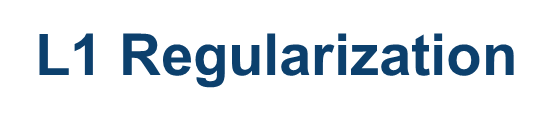
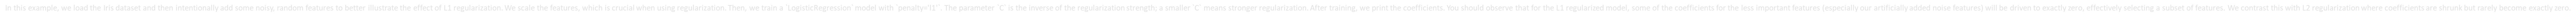
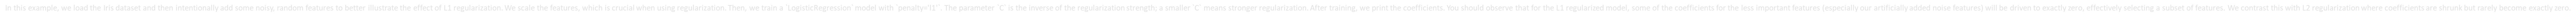
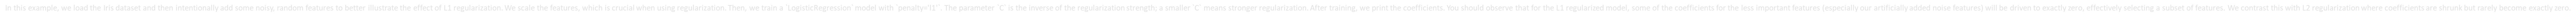

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset (has 4 features)
iris = load_iris()
X = iris.data
y = iris.target

# Add 5 random 'noisy' features
X = np.hstack((X, np.random.rand(X.shape[0], 5)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with L1 regularization (C is inverse of regularization strength)
lr_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=0)
lr_l1.fit(X_train_scaled, y_train)

print("Logistic Regression Coefficients with L1 regularization (C=0.1):")
print(lr_l1.coef_)
print("\nNumber of non-zero coefficients:", np.sum(lr_l1.coef_ != 0))

# Compare with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state=0)
lr_l2.fit(X_train_scaled, y_train)

print("\nLogistic Regression Coefficients with L2 regularization (C=0.1):")
print(lr_l2.coef_)
print("\nNumber of non-zero coefficients:", np.sum(lr_l2.coef_ != 0))


Logistic Regression Coefficients with L1 regularization (C=0.1):
[[ 0.          0.21727581 -1.76358821  0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.46520879  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          1.50556149  0.          0.
   0.          0.          0.        ]]

Number of non-zero coefficients: 4

Logistic Regression Coefficients with L2 regularization (C=0.1):
[[-0.465924    0.60946922 -0.78048662 -0.73169568 -0.1527631  -0.01771346
   0.0636412   0.07780672 -0.0450008 ]
 [ 0.00818825 -0.64102506  0.12997605 -0.10957856  0.07914521  0.14373383
  -0.17568414 -0.07348394  0.07814869]
 [ 0.39387044  0.07322927  0.65202216  0.8388575   0.03410261 -0.11451535
   0.14618901 -0.0051393  -0.02472642]]

Number of non-zero coefficients: 27


## Sequential Feature Selection

This example uses the `mlxtend` library to demonstrate Sequential Forward Selection (SFS). We use a K-Nearest Neighbors classifier as our estimator to evaluate performance. The `SFS` constructor takes parameters like `k_features` (how many features to end up with), `forward` (True for SFS, False for SBS), and a `scoring` metric. Cross-validation (`cv`) is used internally to robustly evaluate performance at each step. After fitting, `sfs.k_feature_idx_` gives you the indices of the selected features. This transformed dataset can then be used to train your final machine learning model, which should now have improved performance or reduced complexity.
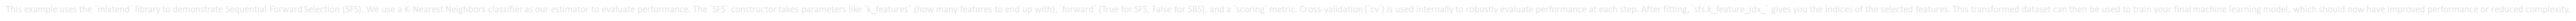
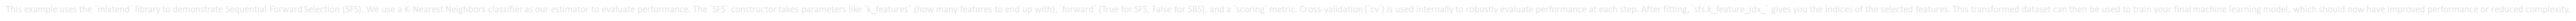
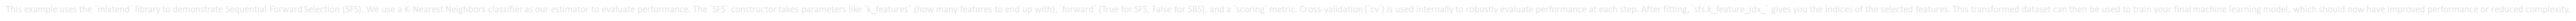
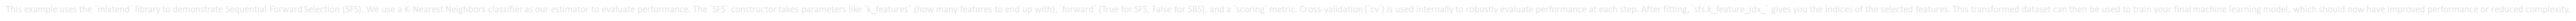

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
sfs = SFS(knn, 
          k_features=2, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

selected_features_idx = list(sfs.k_feature_idx_)
selected_features_names = [iris.feature_names[i] for i in selected_features_idx]
print("Selected features (indices):", selected_features_idx)
print("Selected features (names):", selected_features_names)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

print("\nShape of X_train after SFS:", X_train_sfs.shape)
print("Shape of X_test after SFS:", X_test_sfs.shape)


Selected features (indices): [2, 3]
Selected features (names): ['petal length (cm)', 'petal width (cm)']

Shape of X_train after SFS: (105, 2)
Shape of X_test after SFS: (45, 2)


## Random Forest Feature Importance
Here we demonstrate obtaining feature importances from a trained `RandomForestClassifier`. After training the model, you can access the `feature_importances_` attribute, which returns an array of scores, one for each feature. We then sort these importances in descending order to see the most important features first. The code also includes an optional visualization using `matplotlib` to create a bar plot of the feature importances, providing a clear visual representation of which features your Random Forest model considers most significant for prediction.
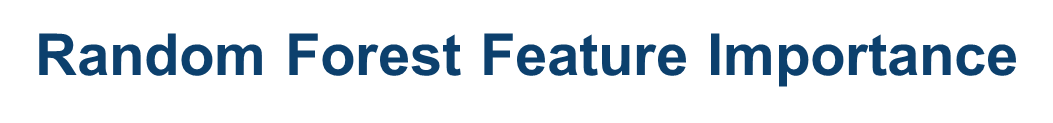
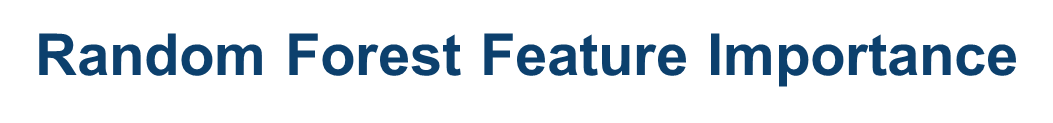
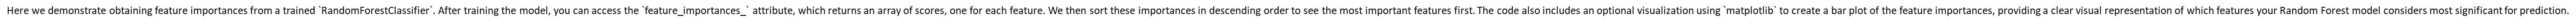
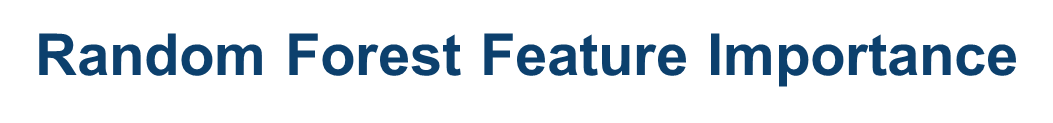
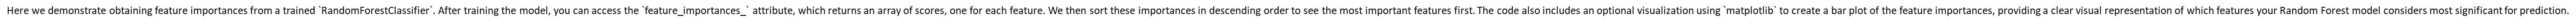
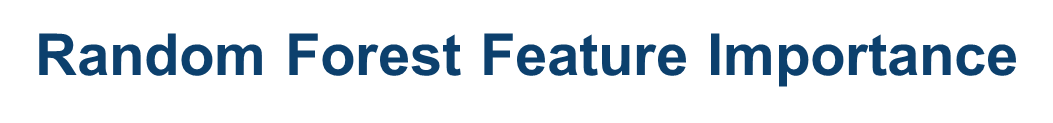
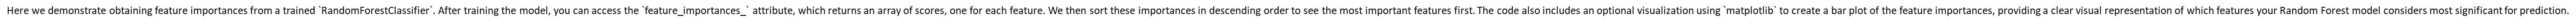
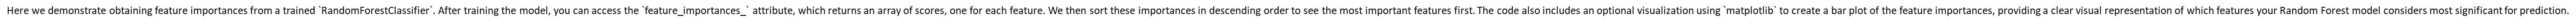

Feature Ranking:
1. feature petal width (cm) (0.4340)
2. feature petal length (cm) (0.4173)
3. feature sepal length (cm) (0.1041)
4. feature sepal width (cm) (0.0446)


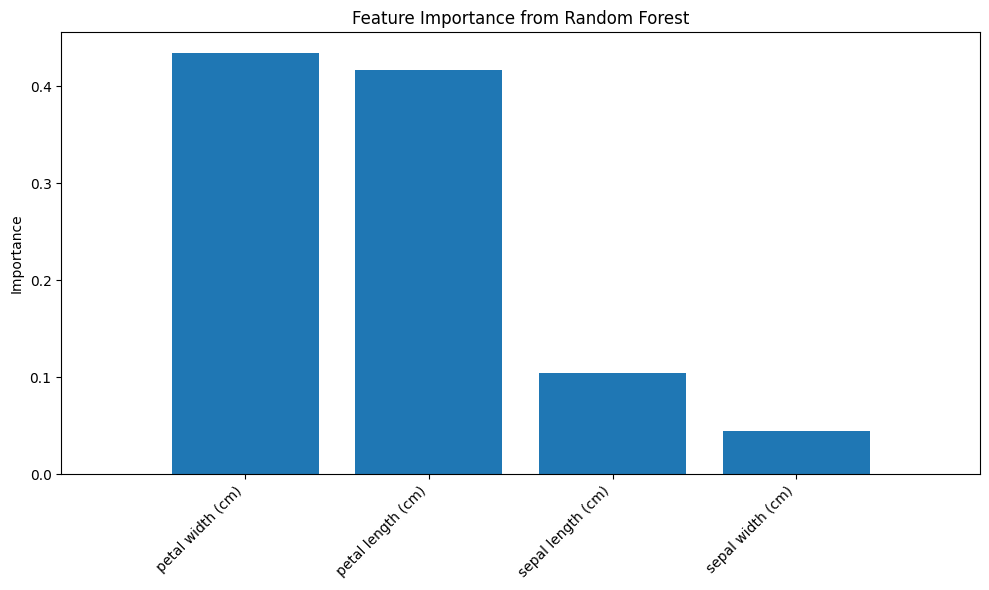

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # Sort in descending order

print("Feature Ranking:")
for f in range(len(feature_names)):
    print(f"{f+1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")
    
# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlim([-1, len(feature_names)])
plt.ylabel("Importance")
plt.tight_layout()
plt.show()